# Installatie

In [21]:
# Lorem ipsum dolor sit amet

# Bag of words
Bag-of-Words (BoW) is een eenvoudige techniek om tekst om te zetten in numerieke vorm, maar het heeft een aantal beperkingen, vooral bij het vastleggen van betekenis en context. Bij de one-hot encoding representeren we elk woord als een unieke vector met alleen nullen en een enkele 1 op de positie die overeenkomt met dat woord in de woordenschat.

Bijvoorbeeld, stel we hebben de volgende woordenlijst (vocabulaire):

In [17]:
["koning", "koningin", "man", "vrouw", "troon"]  

['koning', 'koningin', 'man', 'vrouw', 'troon']

Dan zou de one-hot encoding er als volgt uitzien:

In [19]:
koning    = [1, 0, 0, 0, 0]  
koningin  = [0, 1, 0, 0, 0]  
man       = [0, 0, 1, 0, 0]  
vrouw     = [0, 0, 0, 1, 0]  
troon     = [0, 0, 0, 0, 1]  


Het probleem met deze manier van werken is dat er geen context of betekenis aan woorden kunnen worden meegegeven. Koning en koningin staan qua betekenis dicht bij elkaar, maar dat is uit deze representatie niet duidelijk. Bovendien heb je even lange vectoren nodig als het aantal woorden in je woordenlijst: dat is niet schaalbaar voor echte talen.

# Embeddings
Word2Vec lost deze problemen op door woordvectoren te leren die in een lagere dimensie liggen (bijv. 300 getallen i.p.v. 100.000) én die betekenisvolle relaties tussen woorden behouden.

https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673

In [2]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

corpus = api.load('text8')  # download the corpus and return it opened as an iterable

## Word2Vec

We willen idealiter een vector die bepaalde aspecten van een woord kan capteren. Bekijk volgend fictief voorbeeld:

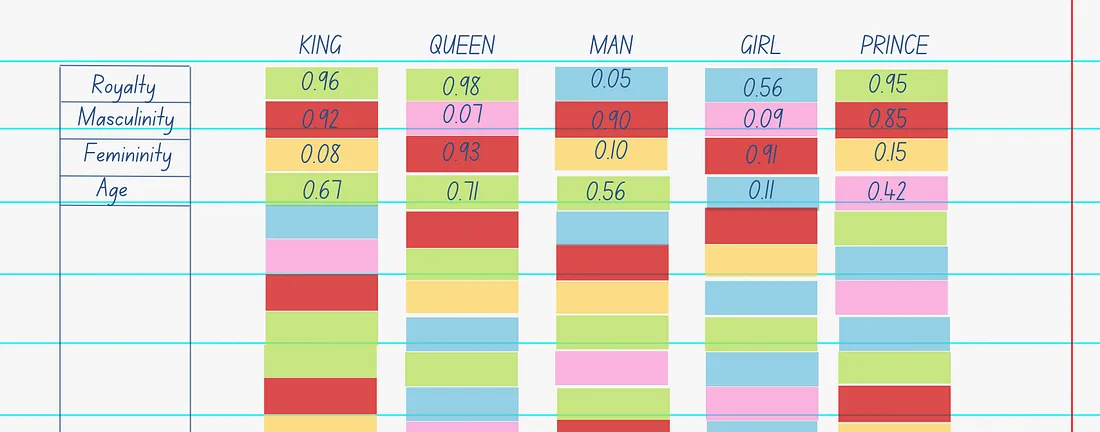

In [3]:
# Word2Vec is een model dat in 2013 werd ontwikkeld door onderzoekers van Google
model = Word2Vec(sentences=corpus, vector_size=50, window=5, min_count=1, workers=4)

In [20]:
# Toon embedding van een woord
print(model.wv["computer"])  # Vector van het woord "computer"

[-0.97972935 -0.16127056 -2.0213418   0.7257336  -0.27811304  0.17307028
 -2.9429724  -2.3600085  -1.5501801  -0.28407755 -1.1292632  -2.6970549
  2.2949438   0.01484943  1.2598822   0.09631044  2.4952824  -3.6912417
  1.0125116  -4.0748024  -2.2396746  -0.3801773   2.2791185   0.888688
 -1.8170472   3.3351717  -0.60776365  1.428341   -2.8559945   0.86236846
  3.700119   -2.8739705  -4.367905   -2.2165449  -2.2175846   4.083833
 -2.8807957   1.2017198   1.6119623   0.27080926  1.6011223  -0.9463345
 -0.9372419  -6.3074684  -0.70452905  1.2304136  -0.9283846  -0.4993044
  2.3378806  -0.734455  ]


In [5]:
king_vector = model.wv["king"]
man_vector = model.wv["man"]
woman_vector = model.wv["woman"]
queen_vector = model.wv['queen']

new_vector = king_vector - man_vector + woman_vector
print(new_vector)

[ 1.2592733   2.6539087   1.5162888  -1.4211051   1.575665    2.1897218
  4.8259287   1.19648    -0.3830219   4.51222     0.69932353 -1.1608715
  0.128538    3.1240306   0.02062076  0.45214462  1.1758074  -3.682527
  0.11617422  0.95814276  2.790493   -5.480804    2.9212184   4.5855007
  3.0858772  -0.2173748   1.0839484  -0.29291636 -0.4406073  -0.8882041
 -2.4193082   4.0126343   2.1298356  -0.6562803   0.08731651 -2.8283978
 -1.048831   -1.9635408   0.5847783  -0.37046397  0.04954493 -1.6098644
  5.207791    1.5065513   3.1482098   0.92398775  4.0127106   1.4328624
 -3.7644553  -0.28270188]


### Hoe is dit model gemaakt ?
Je kan dit model voorstel als een opeenvolging van input naar output.

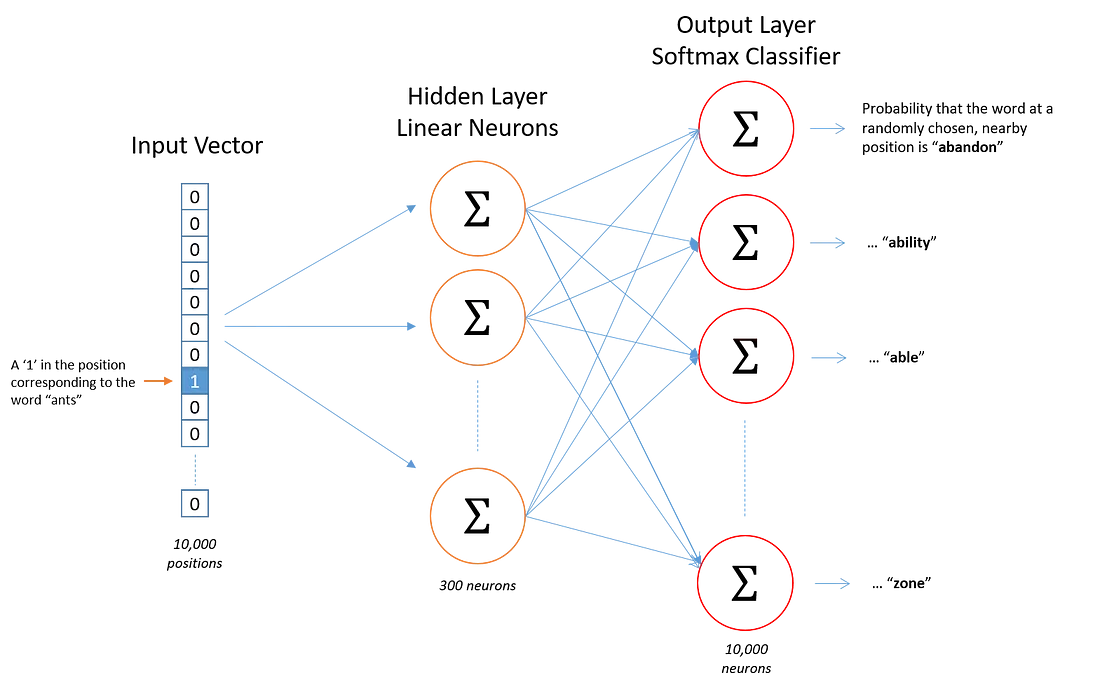

Als input is elk woord gecodeerd volgens zijn positie in de tekst. De oranje cellen hierboven spelen elk de rol van een dimensie van de uiteindelijke vectorruimte waarnaar we de data willen omzetten. In dit geval 300. De output cellen in rood, geven aan of dit woord overeenkomt met een aantal op voorhand gedefinieerde woorden. Dit is een voorbeeld van een neuraal netwerk.

Link naar een voorbeeld: https://playground.tensorflow.org 

### Wat kun je met het getraind model doen ?
Het getraind model heeft een vorm van betekenis geleerd: woorden die 'gelijkaardig' zijn in betekenis, liggen 'dicht bij elkaar. Dat dicht bij elkaar kunnen we uitrekenen:

In [6]:
similarity_score = model.wv.similarity('computer', 'graphics')
print(similarity_score)

0.7619426


Bovendien komt 'dicht bij mekaar' echt overeen met wat je in 2D of 3D al kent voor meetkundige hoeken:

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
new_vec_col = new_vector.reshape(1,-1) # wisselen van rijvector naar kolomvector
queen_vec_col = queen_vector.reshape(1,-1)

In [14]:
similarity_score = cosine_similarity(new_vec_col, queen_vec_col)
similarity_score

array([[0.74248785]], dtype=float32)

In [16]:
import numpy as np

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2) # dit vermenigvuldigt elementsgewijs en telt alles daarna op. Geeft een scalair als resultaat
    
    # de vectoren moeten worden genormeerd
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    # Similarity
    similarity = dot_product / (norm_vec1 * norm_vec2)
    
    return similarity


# je eigen functie gebruiken:
similarity_score = cosine_similarity(new_vector, queen_vector)

print(f"Cosine Similarity: {similarity_score:.6f}")


Cosine Similarity: 0.742488


Prentje cosinusregel invoegen

# Transformers

In [ ]:
from transformers import pipeline

fill_mask = pipeline("fill-mask", model="bert-base-uncased")

print(fill_mask("The cat sat on the [MASK]."))  # Voorspelt het ontbrekende woord


# LLM's

In [ ]:
import ollama

response = ollama.chat(model="mistral", messages=[{"role": "user", "content": "Wat is AI?"}])
print(response['message']['content'])
